# Part II - Explanatory_Data_Analysis
## by Chineneyenwa Ginger-Eke

## Investigation Overview


> In this inverstigation, I want to look at the different characteristics of users. I will also be looking at the marketing strategy for subscription increase. Then to uncover if there are stations with a higher number of type of users than others. This will in turn help the company increase production in those areas, thereby further expanding their company.

## Dataset Overview

> The data includes information about individual rides made in the ford-go-bike system for San Francisco area. The data is for therom 2017 until April 2019. The total amount of data is 183,412 rides.

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Load in the dataset into pandas dataframe
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## (Visualization 1)

### Types of Users

> In this dataset there are 2 types of users (Subscriber and Customer). In most of the cases (89.2%) the user is Subscriber and the rest (10.8%) the user is Customer.

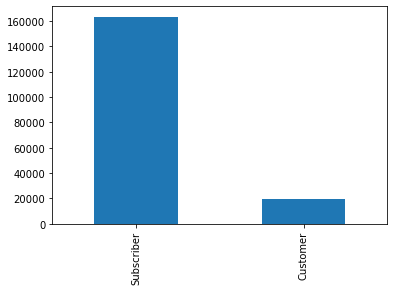

In [3]:
ford_bike.user_type.value_counts().plot(kind='bar');

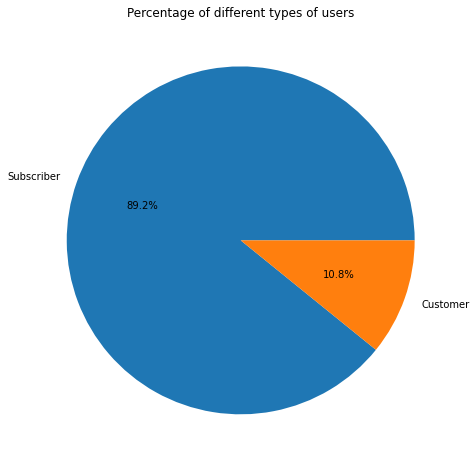

In [4]:
# Creating a pie plot with the different percentages of users
ford_bike.user_type.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8));
plt.title('Percentage of different types of users')
plt.ylabel('')
plt.show()

## Visualization 2
### Types of Users in comparison with days of the month

The amount of customers and subscribers increase at the beginning of the month, mid montha nd month end.

In [9]:
ford_bike = ford_bike.dropna()

In [10]:
ford_bike['start_time'] = pd.to_datetime(ford_bike['start_time'])
ford_bike['end_time'] = pd.to_datetime(ford_bike['end_time'])

In [11]:
ford_bike['start_station_id'] = ford_bike['start_station_id'].astype(int).astype(str)
ford_bike['end_station_id'] = ford_bike['end_station_id'].astype(int).astype(str)
ford_bike['bike_id'] = ford_bike['bike_id'].astype(str)

In [12]:
ford_bike['duration_hour'] = ford_bike['duration_sec']/3600

In [13]:
ford_bike['start_year'] = ford_bike['start_time'].apply(lambda x: x.year)
ford_bike['start_month'] = ford_bike['start_time'].apply(lambda x: x.month)
ford_bike['start_day'] = ford_bike['start_time'].apply(lambda x: x.day)
ford_bike['start_hour'] = ford_bike['start_time'].apply(lambda x: x.hour)
ford_bike['end_year'] = ford_bike['end_time'].apply(lambda x: x.year)
ford_bike['end_month'] = ford_bike['end_time'].apply(lambda x: x.month)
ford_bike['end_day'] = ford_bike['end_time'].apply(lambda x: x.day)
ford_bike['end_hour'] = ford_bike['end_time'].apply(lambda x: x.hour)

In [14]:
def get_month_name(month):
    list_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return(list_months[month-1])

In [15]:
ford_bike['start_month_name'] = ford_bike['start_month'].apply(lambda month: get_month_name(month))
ford_bike['end_month_name'] = ford_bike['end_month'].apply(lambda month: get_month_name(month))

In [16]:
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_year,start_month,start_day,start_hour,end_year,end_month,end_day,end_hour,start_month_name,end_month_name
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,2019,2,28,17,2019,3,1,8,Feb,Mar
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,2019,2,28,12,2019,3,1,5,Feb,Mar
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,2019,2,28,17,2019,3,1,4,Feb,Mar
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,2019,2,28,23,2019,3,1,0,Feb,Mar
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,2019,2,28,23,2019,3,1,0,Feb,Mar


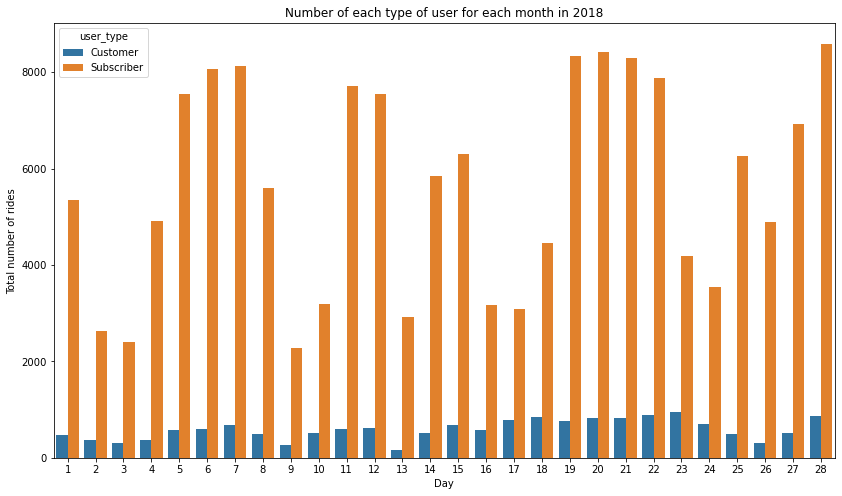

In [18]:
# Plot a countplot using the library Seaborn
plt.figure(figsize=(14,8));
sb.countplot(data = ford_bike.query('start_month == 2'), x = 'start_day', hue = 'user_type');
plt.xlabel('Day');
plt.ylabel('Total number of rides');
plt.title('Number of each type of user for each month in 2018');
plt.show()

## Visualization 3
### Start and end of the rides for each type of user

   In this case, as we saw before, there is a high demand at 1700 and 1800 also at 8 and 9 am. Basically when the people start and end of the work. If we look on the subscribers and customers, we can see that there are more customers using it at the afternoon compared on the moorning.

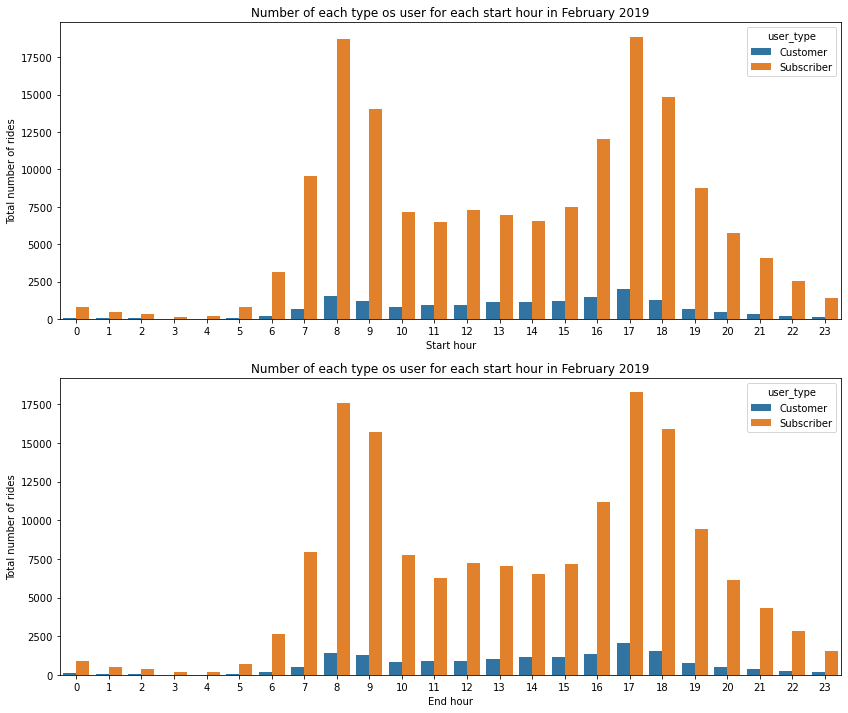

In [20]:
# Plot a countplot using the library Seaborn
fig, ax = plt.subplots(nrows=2, figsize = [14,12])
sb.countplot(data = ford_bike.query('start_month == 2'), x = 'start_hour', hue = 'user_type', ax = ax[0]);
sb.countplot(data = ford_bike.query('start_month == 2'), x = 'end_hour', hue = 'user_type', ax = ax[1]);
ax[0].set_xlabel('Start hour');
ax[0].set_ylabel('Total number of rides');
ax[0].set_title('Number of each type os user for each start hour in February 2019');
ax[1].set_xlabel('End hour');
ax[1].set_ylabel('Total number of rides');
ax[1].set_title('Number of each type os user for each start hour in February 2019');
plt.show()